In [131]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Constants
optimal_viable_counts = 150
optimal_temp = 57
optimal_moisture = 75


# Coefficients
b1 = -1.5  # Negative coefficient for temperature (dominant variable)
b2 = 0.8   # Positive coefficient for moisture
c1 = 78    # Positive constant
c2 = 100   # Positive constant

# Locations
locations = ["Amsterdam", "Rotterdam", "Utrecht", "Maastricht", "Groningen"]

# Generate date range
start_date = datetime(2023, 4, 1)
end_date = datetime(2024, 4, 1)
date_range = pd.date_range(start_date, end_date, freq='D')

# Initialize lists to store data
data = []

# Generate data for each location and each date
np.random.seed(42)  # For reproducibility

for location in locations:
    opt_temp = np.random.normal(loc=optimal_temp, scale=2)
    opt_moisture = np.random.normal(loc=optimal_moisture, scale=2)
    for single_date in date_range:
        # Adjust temperature and moisture based on location-specific conditions
        if location == "Utrecht":
            temp = np.random.normal(loc=opt_temp + 10, scale=2)  # Higher temperature
            moisture = np.random.normal(loc=opt_moisture, scale=2)
        elif location == "Rotterdam":
            temp = np.random.normal(loc=opt_temp, scale=2)
            moisture = np.random.normal(loc=opt_moisture - 15, scale=2)  # Lower moisture
        else:
            temp = np.random.normal(loc=opt_temp, scale=2)
            moisture = np.random.normal(loc=opt_moisture, scale=2)
        
        # Calculate viable counts using the linear relationship
        viable_counts = b1 * temp + b2 * moisture + c1 + c2 + np.random.normal(loc=0, scale=0.5)  # Adding some noise
        

        # Adjust viable counts for Friday
        # if single_date.weekday() == 4:  # Friday
        #     viable_counts *= 0.8  # 10% lower viable counts

        # round viable counts to the nearest integer
        viable_counts = round(viable_counts)

        # round temp and moisture to 1 dp
        temp = round(temp, 1)
        moisture = round(moisture, 1)
        
        # Create sample ID
        sample_id = f"{location[:3].upper()}_{single_date.strftime('%Y%m%d')}"
        
        # Append data to the list
        data.append([sample_id, location, single_date, single_date.strftime('%A'), temp, moisture, viable_counts])

# Create DataFrame
df = pd.DataFrame(data, columns=["SampleID", "Location", "DateTime", "DayOfWeek", "Temperature", "Moisture", "Viable counts"])

# Save the dataframe to a CSV file
df.to_csv('mushroom_compost_monitoring_data.csv', index=False)

# Display the dataframe
#import ace_tools as tools; tools.display_dataframe_to_user(name="Mushroom Compost Monitoring Data with Conditions", dataframe=df)

df.head()


,SampleID,Location,DateTime,DayOfWeek,Temperature,Moisture,Viable counts
0,AMS_20230401,Amsterdam,2023-04-01,Saturday,59.3,77.8,151
1,AMS_20230402,Amsterdam,2023-04-02,Sunday,57.5,77.9,154
2,AMS_20230403,Amsterdam,2023-04-03,Monday,57.1,75.8,153
3,AMS_20230404,Amsterdam,2023-04-04,Tuesday,57.1,75.2,152
4,AMS_20230405,Amsterdam,2023-04-05,Wednesday,54.5,73.6,155


In [132]:
def tussle(optimum, spread):
    return np.random.normal(loc=optimum, scale=spread)

In [126]:
len(df)

1835

(array([0.00175793, 0.00281269, 0.00281269, 0.00439483, 0.00615276,
        0.00544959, 0.00984442, 0.01002022, 0.00386745, 0.0079107 ,
        0.02390788, 0.01687615, 0.01529401, 0.02408368, 0.0288301 ,
        0.04834315, 0.05889074, 0.03498286, 0.01371187, 0.0026369 ]),
 array([100. , 103.1, 106.2, 109.3, 112.4, 115.5, 118.6, 121.7, 124.8,
        127.9, 131. , 134.1, 137.2, 140.3, 143.4, 146.5, 149.6, 152.7,
        155.8, 158.9, 162. ]),
 <BarContainer object of 20 artists>)

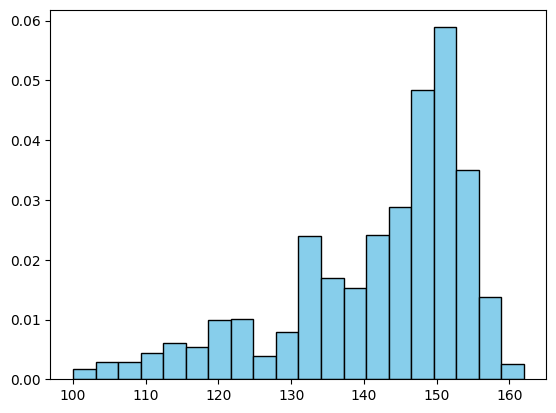

In [127]:
# Generate a histogram for all the viable counts
import matplotlib.pyplot as plt

plt.hist(df['Viable counts'], bins=20, color='skyblue', edgecolor='black', density=True)



In [128]:
# test viable counts for normality
from scipy.stats import shapiro

stat, p = shapiro(df['Viable counts'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.886, p=0.000


In [129]:
# test viable counts for normality just for location Utrecht
stat, p = shapiro(df[df['Location'] == 'Utrecht']['Viable counts'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.734, p=0.000


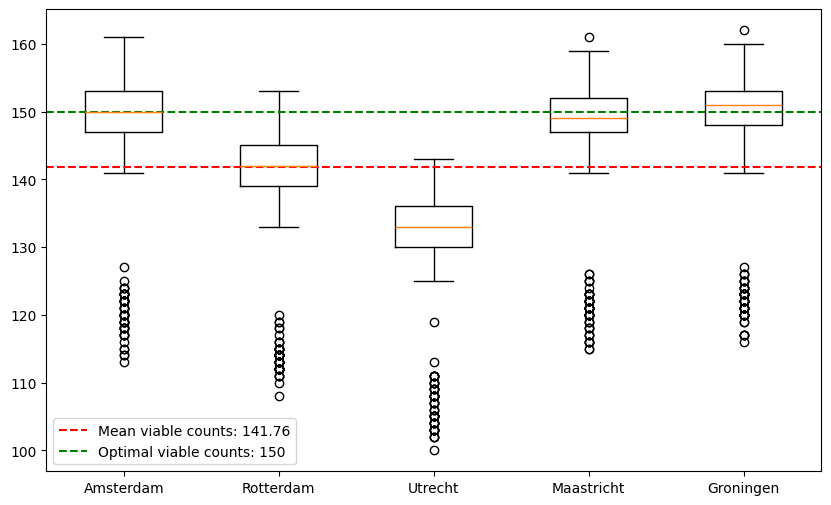

In [130]:
# Boxplot of viable counts for each location using matplotlib
plt.figure(figsize=(10, 6))

plt.boxplot([df[df['Location'] == location]['Viable counts'] for location in locations], labels=locations)

# calculate mean viable counts for all and add to the boxplot as horizontal line
mean_viable_counts = df['Viable counts'].mean()
plt.axhline(mean_viable_counts, color='red', linestyle='--', label=f'Mean viable counts: {mean_viable_counts:.2f}')

# add optimal value as horizontal line
plt.axhline(optimal_viable_counts, color='green', linestyle='--', label=f'Optimal viable counts: {optimal_viable_counts}')

# add legend for mean and optimal value
plt.legend()



{'whiskers': [<matplotlib.lines.Line2D at 0x244cf036510>,
 'caps': [<matplotlib.lines.Line2D at 0x244cfdc31d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x244d3f35fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x244d29b36b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x244d293d490>,
 'means': []}

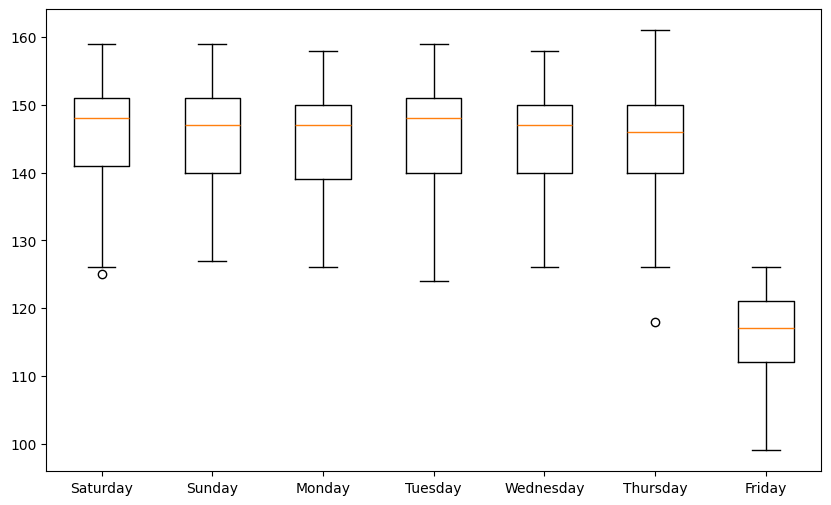

In [120]:
# Boxplot showing viable counts for each day of the week
plt.figure(figsize=(10, 6))

plt.boxplot([df[df['DayOfWeek'] == day]['Viable counts'] for day in df['DayOfWeek'].unique()], labels=df['DayOfWeek'].unique())

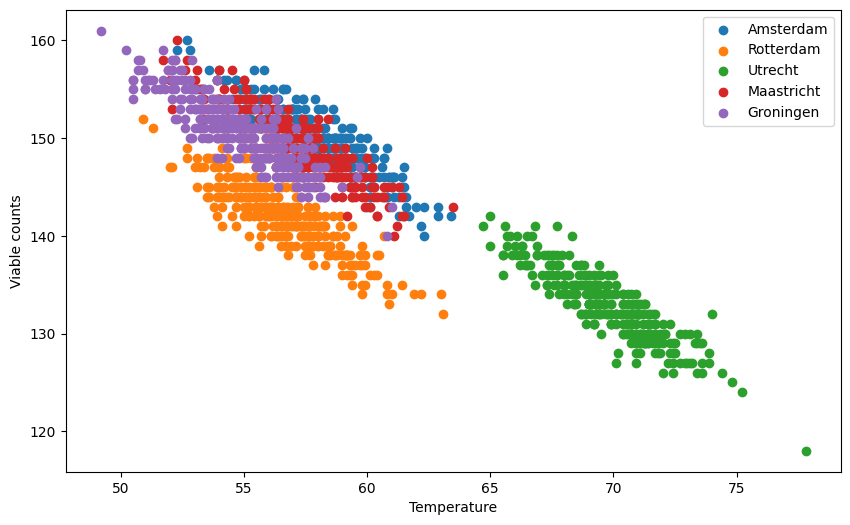

In [121]:
# scatterplot of viable counts vs temperature
plt.figure(figsize=(10, 6))

#plt.scatter(df['Temperature'], df['Viable counts'], color='skyblue', alpha=0.6)

# color the points based on the location
# remove Friday data

for location in locations:
    plt.scatter(df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Temperature'], 
                df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Viable counts'], 
                label=location)

plt.xlabel('Temperature')
plt.ylabel('Viable counts')

plt.legend()




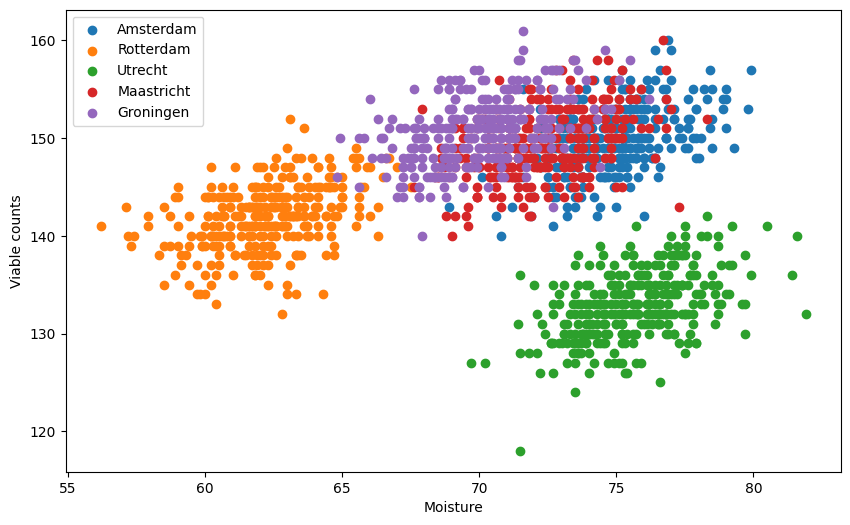

In [109]:
# scatterplot of viable counts vs temperature
plt.figure(figsize=(10, 6))

#plt.scatter(df['Temperature'], df['Viable counts'], color='skyblue', alpha=0.6)

# color the points based on the location
for location in locations:
    plt.scatter(df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Moisture'], 
                df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Viable counts'], 
                label=location)


plt.xlabel('Moisture')
plt.ylabel('Viable counts')

plt.legend()




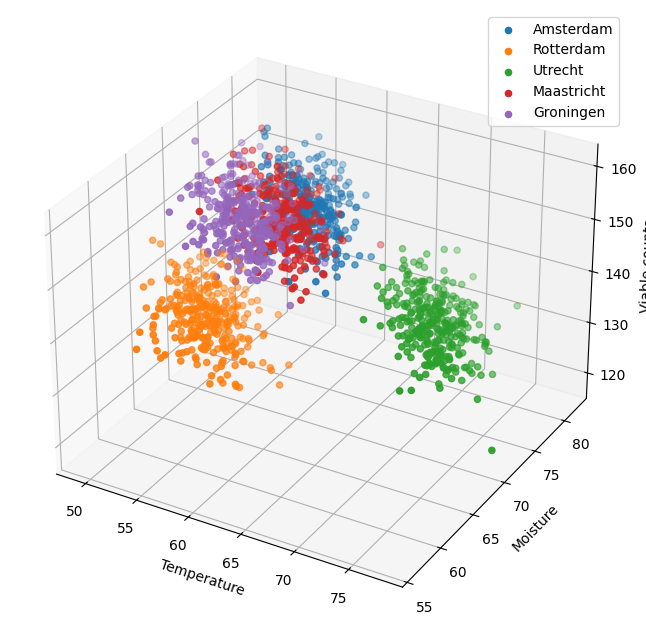

In [122]:
# can you plot a 3D scatter plot of viable counts vs temperature vs moisture
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for location in locations:
    ax.scatter(df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Temperature'], 
               df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Moisture'], 
               df[(df['Location'] == location) & (df['DayOfWeek'] != 'Friday')]['Viable counts'], 
               label=location)
    
ax.set_xlabel('Temperature')

ax.set_ylabel('Moisture')

ax.set_zlabel('Viable counts')

plt.legend()

plt.show()

In [123]:
# can you make an interactive 3D scatter plot of viable counts vs temperature vs moisture

import plotly.express as px

fig = px.scatter_3d(df[df['DayOfWeek'] != 'Friday'], x='Temperature', y='Moisture', z='Viable counts', color='Location',
                    title='Viable counts vs Temperature vs Moisture')

# change the point size and make semi-transparent
fig.update_traces(marker=dict(size=5, opacity=0.6))

# change the height/width aspect ratio
fig.update_layout(scene_aspectmode='cube')


fig.show()
